In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier          
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000  

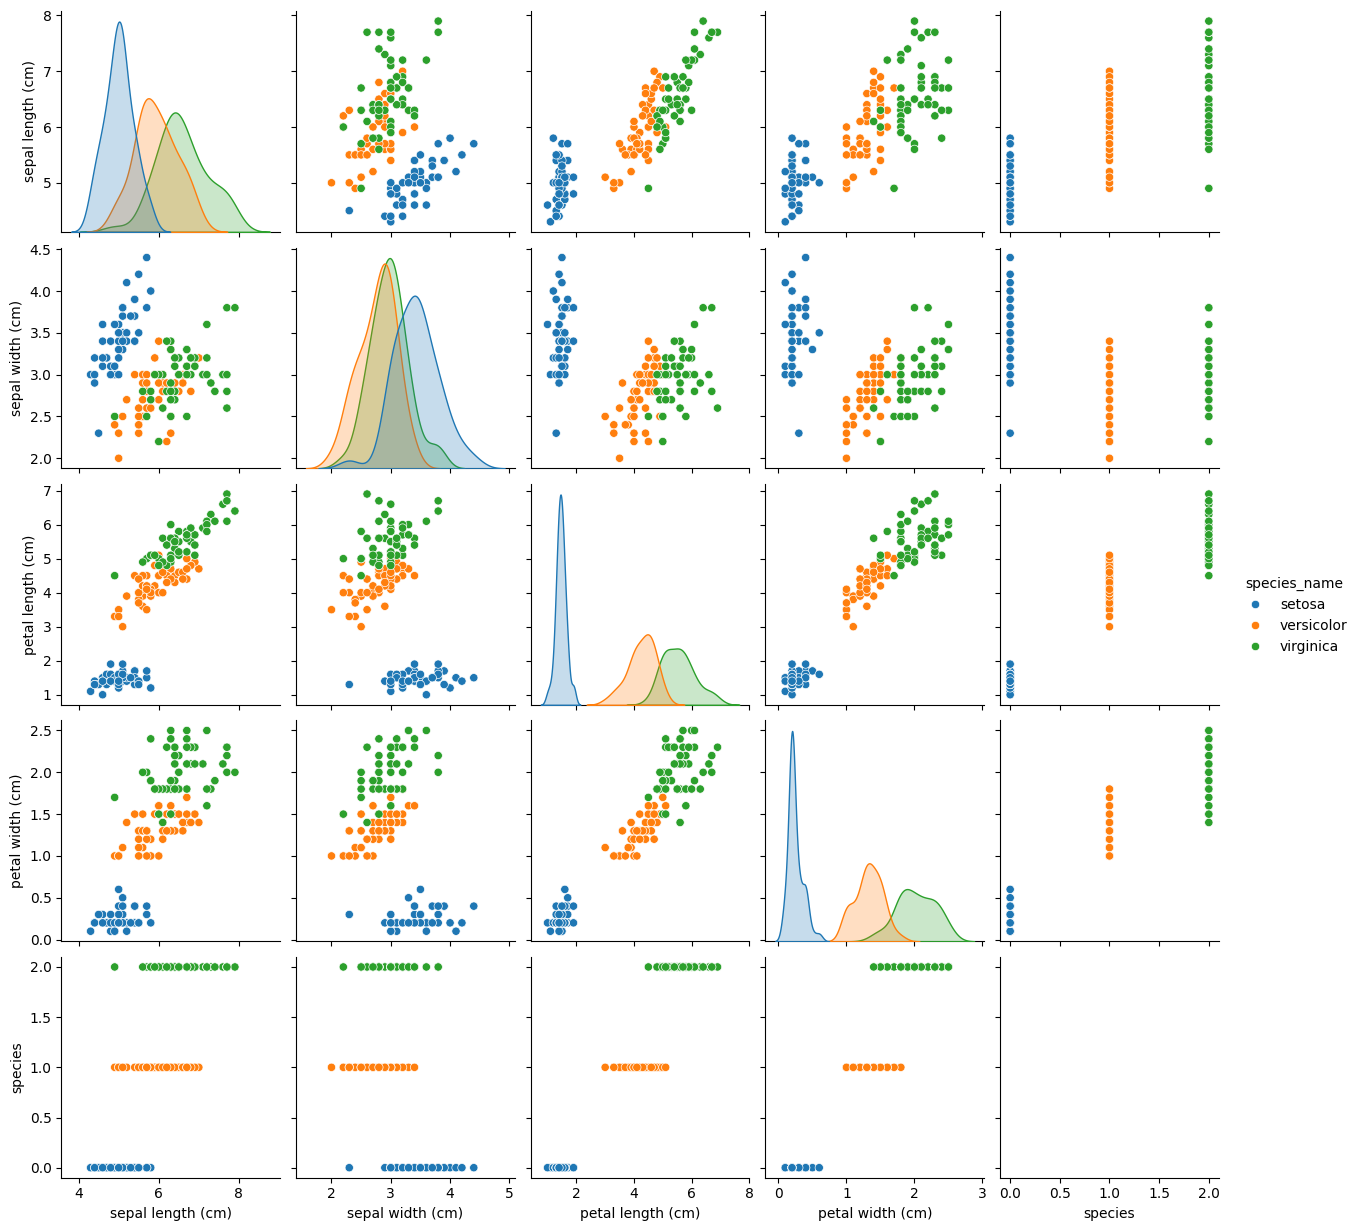

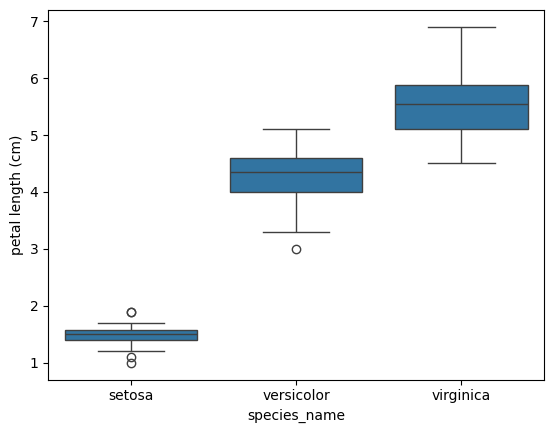

In [8]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(df.head())
print(df.describe())
print(df['species_name'].value_counts())

# Visuals
sns.pairplot(df, hue='species_name')
plt.show()

sns.boxplot(x='species_name', y='petal length (cm)', data=df)
plt.show()

In [ ]:
X = iris.data         
y = iris.target        

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)   
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
